# **COMPARACIÓN ORDENAMIENTO EN PARALELO**

In [1]:
#%pip install numpy matplotlib
#Importamos las librerias necesirias
from functions import gaussianRandom as gss
from sort import MergeSort
from sort import BubbleSort
from sort import QuickSort

import matplotlib.pyplot as plt

### **DATABASE**

In [2]:
data = gss(1000000)

In [3]:
# Visualización de algunos valores
print(data[:10], end=' ')

[0.27312954579141246, 0.8745360112943376, -1.038629606724944, 0.822939894333248, 0.09636533249620642, 2.1628963285940492, 1.2033272990885735, -0.028314143245636275, 0.03133340196337322, 1.0855797489394559] 

### **CAMPANA GAUSS**

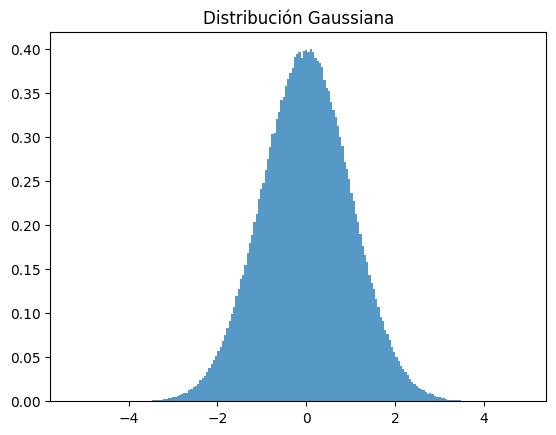

In [4]:
# Visualizar Gráficamente la distribución gaussiana
plt.hist(data, bins=200, density=True, alpha=0.75)
plt.title('Distribución Gaussiana')
plt.show()

In [5]:
logs = []

### **MERGESORT BENCHMARK**

In [6]:
sort = MergeSort()
th_merge_sort = sort.run(data)
logs.append(sort.log())

print(th_merge_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [7]:
sort = MergeSort(threads=2)
th2_merge_sort = sort.run(data)
logs.append(sort.log())

print(th2_merge_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [8]:
sort = MergeSort(threads=4)
th4_merge_sort = sort.run(data)
logs.append(sort.log())

print(th4_merge_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [9]:
sort = MergeSort(threads=6)
th6_merge_sort = sort.run(data)
logs.append(sort.log())

print(th6_merge_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

### **QUICKSORT BENCHMARK**

In [10]:
sort = QuickSort()
th_quick_sort = sort.run(data)
logs.append(sort.log())

print(th_quick_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [11]:
sort = QuickSort(threads = 2)
th2_quick_sort = sort.run(data)
logs.append(sort.log())

print(th2_quick_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [12]:
sort = QuickSort(threads = 4)
th4_quick_sort = sort.run(data)
logs.append(sort.log())

print(th4_quick_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

In [13]:
sort = QuickSort(threads = 6)
th6_quick_sort = sort.run(data)
logs.append(sort.log())

print(th6_quick_sort[:5], end=' ')

[-5.251053976857637, -4.911158904413298, -4.49050786623574, -4.48132671591166, -4.3787129267555756] 

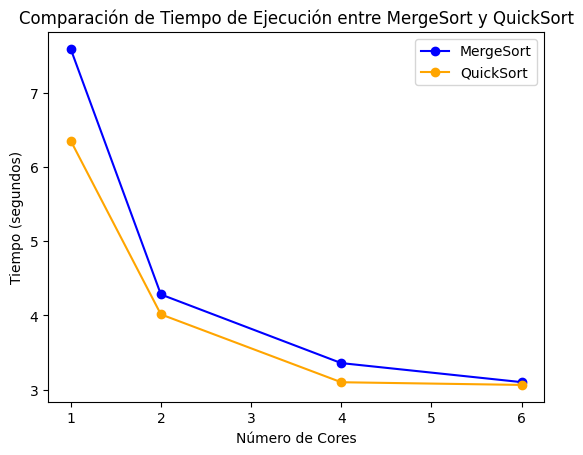

In [16]:
merge_sort_data = [entry for entry in logs if entry['name'] == 'MergeSort']
quick_sort_data = [entry for entry in logs if entry['name'] == 'QuickSort']

# Ordenar los datos según el número de cores
merge_sort_data.sort(key=lambda x: x['cores'])
quick_sort_data.sort(key=lambda x: x['cores'])

# Extraer las coordenadas x e y para cada algoritmo
merge_x = [entry['cores'] for entry in merge_sort_data]
merge_y = [entry['time'] for entry in merge_sort_data]

quick_x = [entry['cores'] for entry in quick_sort_data]
quick_y = [entry['time'] for entry in quick_sort_data]

# Graficar los datos
plt.plot(merge_x, merge_y, marker='o', label='MergeSort', linestyle='-', color='blue')
plt.plot(quick_x, quick_y, marker='o', label='QuickSort', linestyle='-', color='orange')

# Agregar etiquetas y título
plt.xlabel('Número de Cores')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de Tiempo de Ejecución entre MergeSort y QuickSort')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()